In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils.context_data_csv import ContextDataCSV
from utils.matrix_optimizer import MatrixOptimizer

import utils.sulfur.constant as const
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def scatterPlot(xDF, animal_name):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1])
    tempDF.columns = ['first vector', 'second vector']
    tempDF = tempDF.reset_index(level=0)
    sns.lmplot(x='first vector', y = 'second vector', hue='cell_type', data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title(animal_name)
    plt.show()
    
def split_by_time(matrix):
    matrix_1 = matrix.iloc[0:400, :]
    matrix_2 = matrix.iloc[900:1300, :]
    matrix_3 = matrix.iloc[1800:2200, :]
    
    return matrix_1, matrix_2, matrix_3

In [3]:
engram_shock_cells = {
    'ID181106CreA': ['C261', 'C305', 'C347', 'C349', 'C351'],
    'ID181106CreB': ['C058', 'C089', 'C126'],
    'ID181106CreC': ['C017', 'C065', 'C112', 'C117', 'C203', 'C227'],
    'ID181106CreG': ['C127', 'C239', 'C323', 'C347', 'C350', 'C399', 'C402'],
    'ID181106CreH': ['C164', 'C180', 'C184', 'C243', 'C253', 'C298', 'C327', 'C351', 'C534', 'C542'],
    'ID181106CreI': ['C136', 'C197', 'C273', 'C292', 'C294', 'C306', 'C333'],
    'ID181106CreK': ['C083', 'C088', 'C100', 'C149', 'C390'],
    'ID181106CreL': ['C200'],
    'ID181106CreN': ['C199', 'C255', 'C258', 'C273'],
    'ID181106CreQ': ['C393']
}

non_engram_shock_cells = {
    'ID181106CreA': ['C000', 'C007', 'C009', 'C059', 'C076', 'C084', 'C086', 'C099', 'C101', 'C116', 'C120', 'C124', 'C141', 'C143', 'C145', 'C153', 'C164', 'C173', 'C175', 'C197', 'C198', 'C228', 'C234', 'C235', 'C284', 'C303', 'C306', 'C310', 'C317', 'C325', 'C327', 'C328', 'C336', 'C362', 'C377', 'C442', 'C459', 'C476', 'C479', 'C480', 'C487', 'C491', 'C493', 'C494', 'C519'],
    'ID181106CreB': ['C000', 'C003', 'C009', 'C010', 'C063', 'C066', 'C071', 'C072', 'C073', 'C080', 'C083', 'C088', 'C090', 'C094', 'C100', 'C103', 'C108', 'C109', 'C112', 'C114', 'C115', 'C127', 'C130', 'C131', 'C134', 'C166', 'C168', 'C169', 'C177', 'C178', 'C179', 'C200', 'C202', 'C203', 'C213', 'C230', 'C231', 'C268', 'C279', 'C282', 'C284'],
    'ID181106CreC': ['C002', 'C011', 'C012', 'C016', 'C019', 'C043', 'C045', 'C049', 'C050', 'C054', 'C055', 'C056', 'C058', 'C060', 'C063', 'C070', 'C072', 'C074', 'C076', 'C079', 'C084', 'C086', 'C088', 'C096', 'C105', 'C107', 'C118', 'C127', 'C132', 'C143', 'C144', 'C146', 'C153', 'C155', 'C160', 'C168', 'C186', 'C192', 'C193', 'C194', 'C198', 'C202', 'C205', 'C215', 'C219', 'C224', 'C233', 'C235', 'C237', 'C238', 'C239', 'C241', 'C256', 'C257', 'C262', 'C268', 'C272', 'C276', 'C287', 'C294', 'C295', 'C296'],
    'ID181106CreG': ['C003', 'C004', 'C005', 'C010', 'C011', 'C017', 'C025', 'C063', 'C067', 'C070', 'C071', 'C073', 'C076', 'C089', 'C102', 'C118', 'C126', 'C133', 'C136', 'C142', 'C157', 'C166', 'C177', 'C193', 'C197', 'C199', 'C204', 'C205', 'C210', 'C212', 'C229', 'C232', 'C244', 'C247', 'C249', 'C253', 'C261', 'C273', 'C286', 'C291', 'C293', 'C294', 'C298', 'C302', 'C304', 'C305', 'C309', 'C313', 'C325', 'C338', 'C344', 'C352', 'C353', 'C361', 'C377', 'C385', 'C426', 'C449', 'C458', 'C478'],
    'ID181106CreH': ['C018', 'C021', 'C059', 'C074', 'C081', 'C085', 'C087', 'C125', 'C127', 'C148', 'C160', 'C175', 'C203', 'C218', 'C232', 'C249', 'C252', 'C256', 'C261', 'C268', 'C271', 'C350', 'C361', 'C385', 'C386', 'C395', 'C397', 'C400', 'C404', 'C411', 'C475', 'C490', 'C493', 'C497', 'C498', 'C505', 'C511', 'C520', 'C521', 'C525', 'C529', 'C541', 'C579', 'C594', 'C603', 'C632', 'C636'],
    'ID181106CreI': ['C012', 'C049', 'C061', 'C143', 'C164', 'C166', 'C176', 'C183', 'C214', 'C249', 'C254', 'C256', 'C270', 'C275', 'C281', 'C302', 'C325', 'C326', 'C327', 'C341', 'C352', 'C368'],
    'ID181106CreK': ['C006', 'C045', 'C066', 'C071', 'C075', 'C080', 'C085', 'C102', 'C114', 'C117', 'C123', 'C124', 'C133', 'C136', 'C145', 'C178', 'C180', 'C202', 'C205', 'C206', 'C207', 'C208', 'C233', 'C238', 'C239', 'C243', 'C251', 'C262', 'C267', 'C277', 'C291', 'C297', 'C323', 'C325', 'C341', 'C352', 'C361', 'C376', 'C380', 'C399', 'C403', 'C411', 'C424', 'C428'],
    'ID181106CreL': ['C008', 'C015', 'C020', 'C021', 'C037', 'C040', 'C044', 'C049', 'C061', 'C069', 'C073', 'C074', 'C075', 'C082', 'C085', 'C123', 'C125', 'C126', 'C128', 'C129', 'C132', 'C133', 'C144', 'C150', 'C155', 'C162', 'C173', 'C180', 'C185', 'C196', 'C203', 'C209', 'C211', 'C213', 'C216', 'C224', 'C231', 'C236', 'C243', 'C255', 'C270', 'C273', 'C283', 'C298', 'C312', 'C315', 'C323', 'C332', 'C341', 'C343', 'C344', 'C346', 'C350', 'C353', 'C357', 'C373', 'C414', 'C416', 'C424', 'C439', 'C445', 'C456', 'C461', 'C463', 'C475', 'C498', 'C501'],
    'ID181106CreN': ['C008', 'C022', 'C028', 'C044', 'C048', 'C057', 'C062', 'C069', 'C079', 'C089', 'C098', 'C123', 'C144', 'C168', 'C186', 'C201', 'C204', 'C213', 'C217', 'C227', 'C228', 'C239', 'C261', 'C267', 'C288', 'C290', 'C301', 'C306', 'C309', 'C321', 'C343', 'C355', 'C391', 'C395', 'C397', 'C402', 'C404', 'C410', 'C412', 'C413', 'C416', 'C425', 'C429', 'C441', 'C463', 'C469', 'C490', 'C506', 'C511', 'C517'],
    'ID181106CreQ': ['C000', 'C001', 'C006', 'C009', 'C019', 'C022', 'C033', 'C034', 'C040', 'C042', 'C050', 'C055', 'C057', 'C059', 'C061', 'C070', 'C076', 'C089', 'C092', 'C098', 'C108', 'C118', 'C121', 'C122', 'C123', 'C127', 'C132', 'C134', 'C137', 'C168', 'C169', 'C173', 'C179', 'C181', 'C192', 'C202', 'C205', 'C207', 'C209', 'C214', 'C217', 'C239', 'C260', 'C263', 'C281', 'C284', 'C305', 'C308', 'C316', 'C325', 'C332', 'C333', 'C335', 'C336', 'C343', 'C347', 'C354', 'C362', 'C365', 'C368', 'C372', 'C374', 'C375', 'C380', 'C387', 'C398', 'C412', 'C417', 'C421', 'C426', 'C431', 'C434', 'C455', 'C456', 'C463', 'C464', 'C470', 'C485', 'C491']
}

In [4]:
all_shock_cells = {}
for animal_name in engram_shock_cells:
    all_shock_cells[animal_name] = engram_shock_cells[animal_name] + non_engram_shock_cells[animal_name]
    
all_shock_cells

{'ID181106CreA': ['C261',
  'C305',
  'C347',
  'C349',
  'C351',
  'C000',
  'C007',
  'C009',
  'C059',
  'C076',
  'C084',
  'C086',
  'C099',
  'C101',
  'C116',
  'C120',
  'C124',
  'C141',
  'C143',
  'C145',
  'C153',
  'C164',
  'C173',
  'C175',
  'C197',
  'C198',
  'C228',
  'C234',
  'C235',
  'C284',
  'C303',
  'C306',
  'C310',
  'C317',
  'C325',
  'C327',
  'C328',
  'C336',
  'C362',
  'C377',
  'C442',
  'C459',
  'C476',
  'C479',
  'C480',
  'C487',
  'C491',
  'C493',
  'C494',
  'C519'],
 'ID181106CreB': ['C058',
  'C089',
  'C126',
  'C000',
  'C003',
  'C009',
  'C010',
  'C063',
  'C066',
  'C071',
  'C072',
  'C073',
  'C080',
  'C083',
  'C088',
  'C090',
  'C094',
  'C100',
  'C103',
  'C108',
  'C109',
  'C112',
  'C114',
  'C115',
  'C127',
  'C130',
  'C131',
  'C134',
  'C166',
  'C168',
  'C169',
  'C177',
  'C178',
  'C179',
  'C200',
  'C202',
  'C203',
  'C213',
  'C230',
  'C231',
  'C268',
  'C279',
  'C282',
  'C284'],
 'ID181106CreC': ['C017',


In [5]:
animal_name = const.ANIMAL_NAMES[0]
shock_cells = all_shock_cells[animal_name]
a1_csv = ContextDataCSV(animal_name, 'A1postES')
a1_matrix = MatrixOptimizer(a1_csv.data_frame).divide_sd()
a1_shock_cell_df = a1_matrix.loc[:, shock_cells]
a1_1_shock_df = a1_shock_cell_df.iloc[1800:2200, :]
a1_1_shock_df

,C261,C305,C347,C349,C351,C000,C007,C009,C059,C076,...,C442,C459,C476,C479,C480,C487,C491,C493,C494,C519
1800,1.591611,0.978148,2.254854,3.428247,0.675813,0.210232,0.000862,0.861401,1.276714,0.003988,...,0.556282,2.173143,0.292573,3.137764,0.471535,0.036679,3.805874,1.273986,0.817053,0.734475
1801,1.438538,1.571428,2.329904,3.195681,1.626684,0.188430,1.567501,0.808353,1.164774,0.003654,...,0.508370,2.243813,0.257664,3.315656,0.443224,0.032973,3.509185,1.141816,0.735076,0.653985
1802,1.300188,1.725798,2.280165,2.978493,1.417027,0.168889,1.425453,1.063805,1.062649,1.893956,...,0.638776,2.209024,0.265289,3.205359,0.416568,0.029642,3.557738,1.506153,0.661325,0.582314
1803,1.175144,1.534841,2.008682,2.775667,1.234391,0.391804,2.393501,1.128663,1.381783,1.743635,...,0.597854,2.101110,0.233636,3.170485,0.391471,0.026646,3.520449,1.349896,1.076453,0.518497
1804,1.062125,1.365005,1.769522,2.586253,1.075293,0.351173,2.176605,1.190877,1.647578,1.605245,...,0.527901,1.914932,0.205760,2.892559,0.367842,0.023953,3.390850,1.209850,0.968450,0.461673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,1.717635,1.113167,0.012938,2.155350,1.172573,0.156173,1.704652,0.698405,1.196297,2.173598,...,0.672328,2.400266,0.000754,2.063387,0.217785,0.220407,3.115763,2.326408,0.904882,1.086248
2190,2.166871,0.989967,0.011397,2.203542,1.021443,0.139977,1.550176,0.655395,1.091408,2.132768,...,0.593661,2.506797,0.000664,1.881978,0.204313,0.198152,2.872465,2.085052,0.814094,1.222522
2191,2.359726,0.880393,0.010040,2.051958,0.889790,1.080555,1.409698,0.615033,0.995715,2.125648,...,0.524198,2.284671,0.000585,2.380575,0.191629,0.322903,2.647989,1.868738,0.732414,1.088552
2192,2.132781,0.782938,0.008845,1.910398,0.775106,1.252358,1.281950,0.577157,0.908413,1.956941,...,0.462863,3.081753,0.000515,2.171514,0.179686,0.322974,2.440879,1.674864,0.658929,0.969263


animal name: ID181106CreA


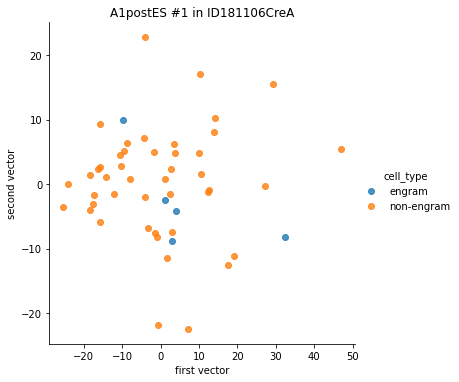

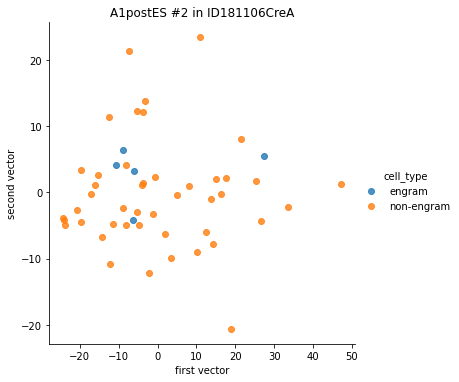

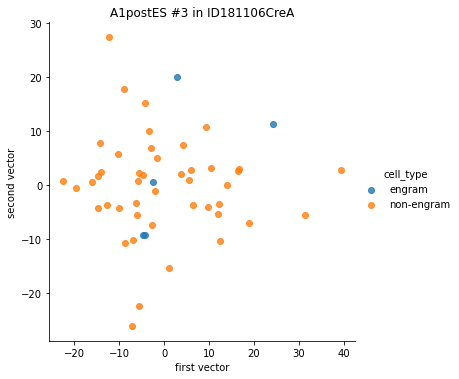

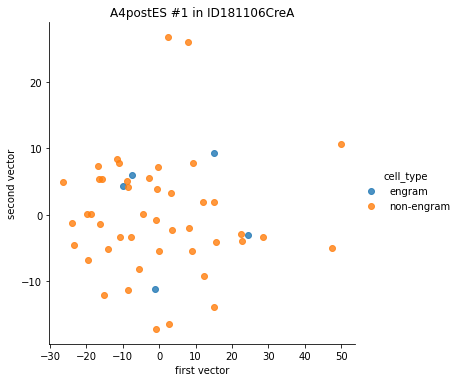

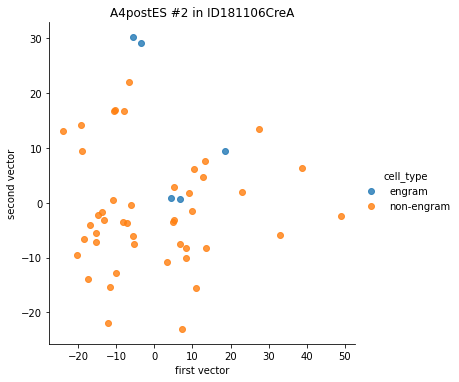

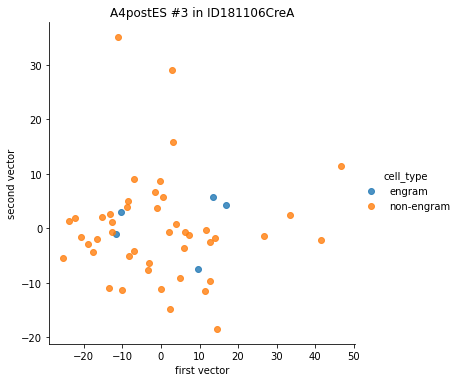

animal name: ID181106CreB


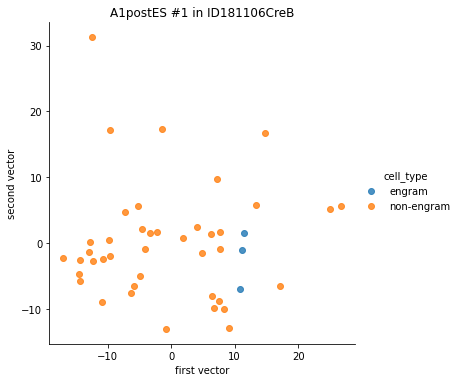

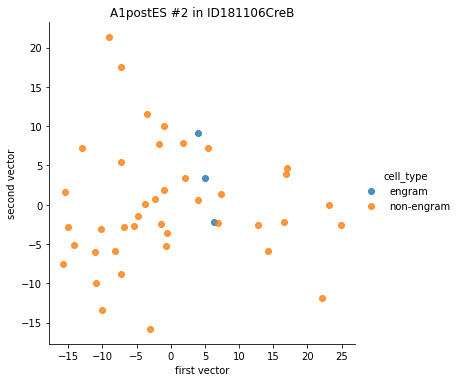

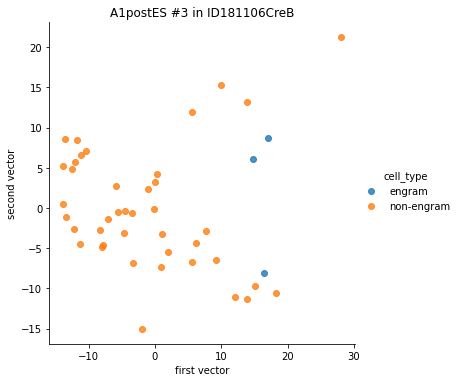

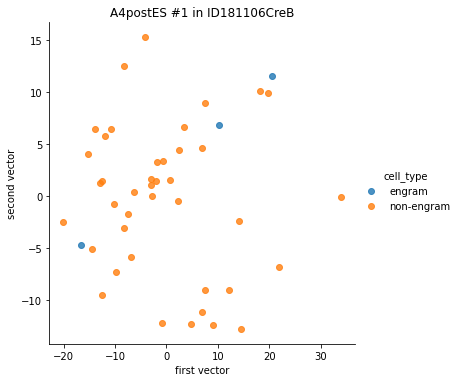

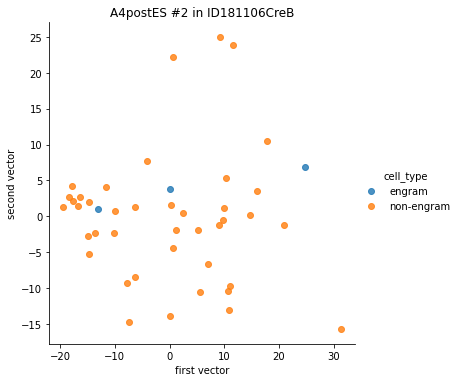

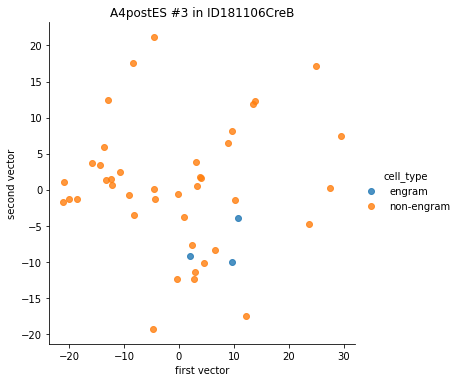

animal name: ID181106CreC


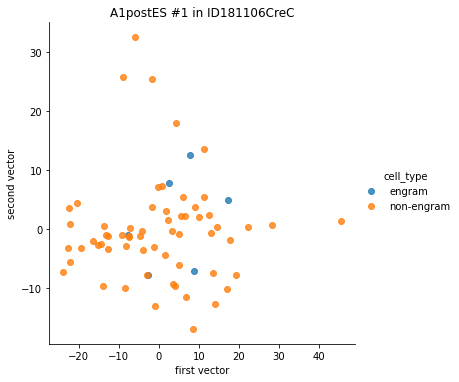

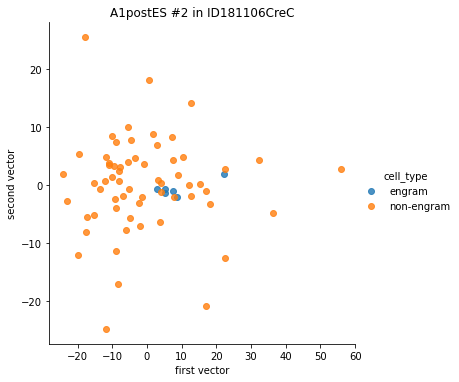

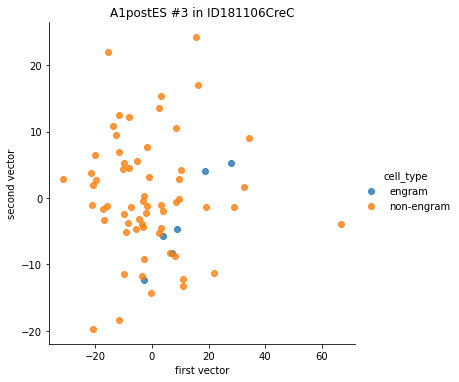

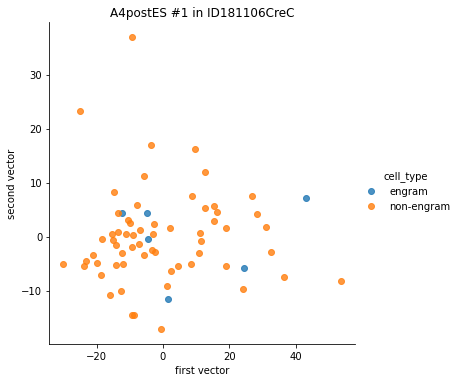

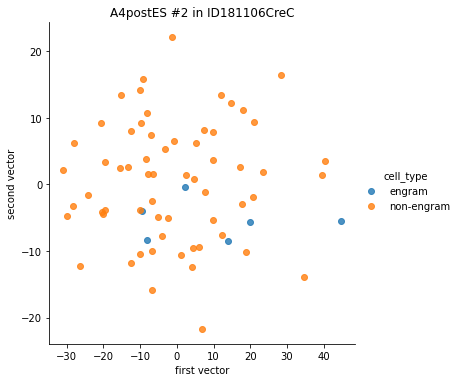

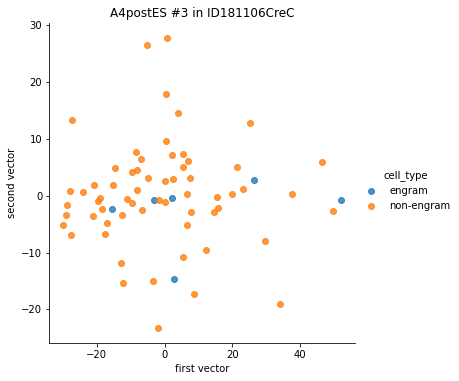

animal name: ID181106CreG


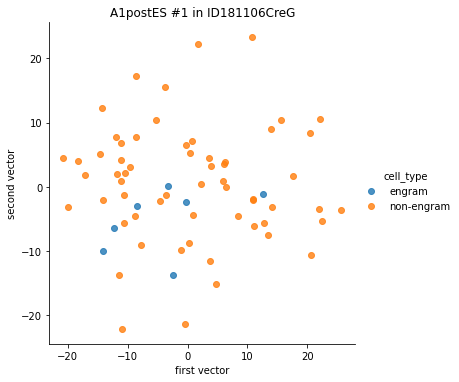

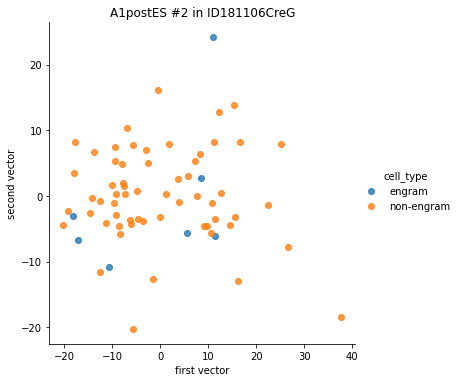

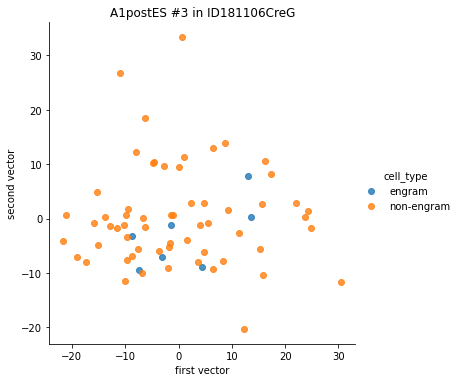

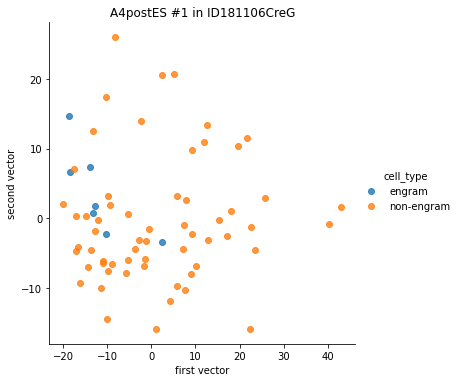

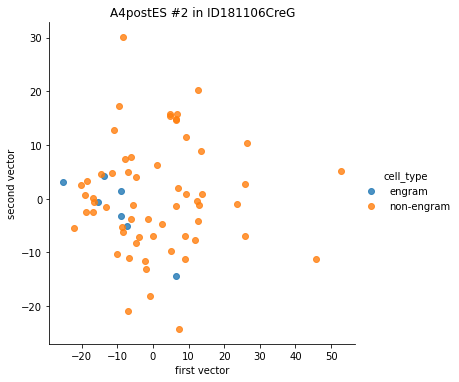

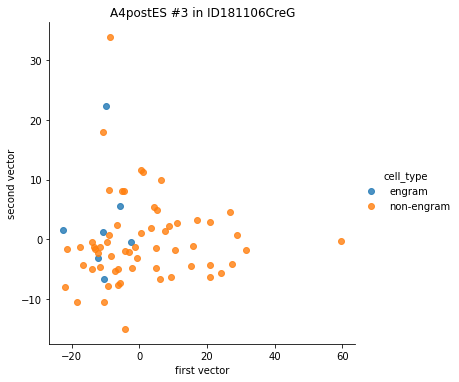

animal name: ID181106CreH


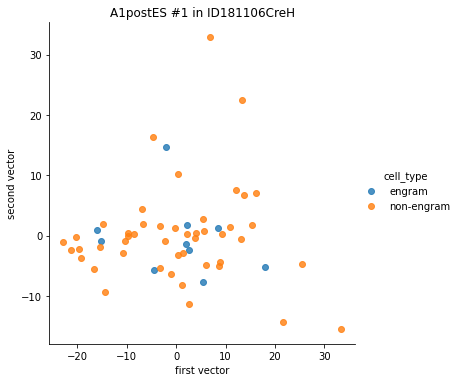

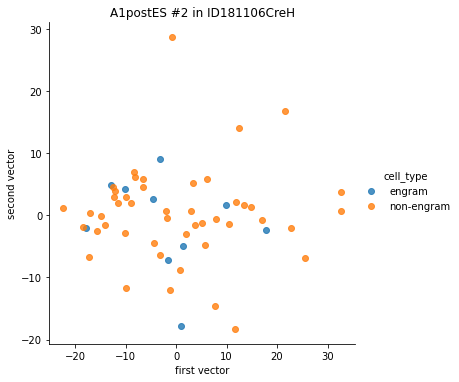

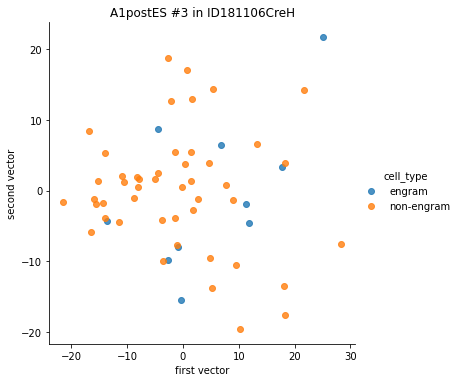

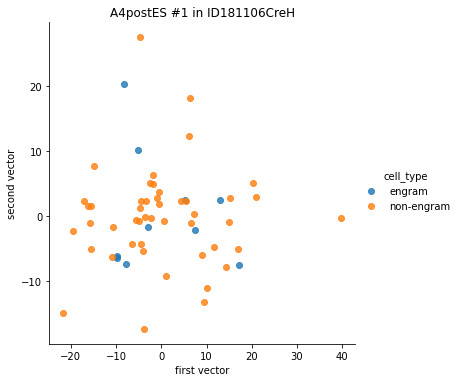

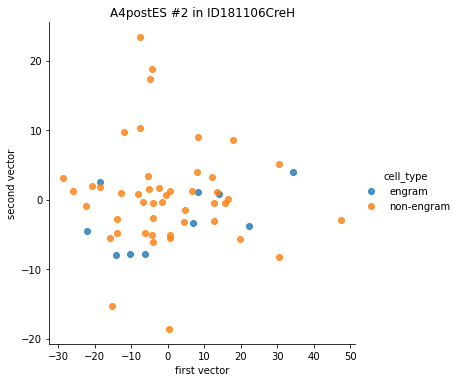

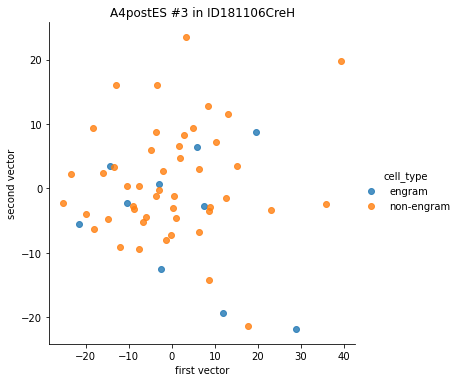

animal name: ID181106CreI


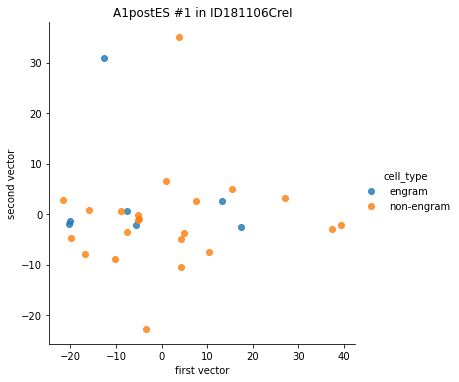

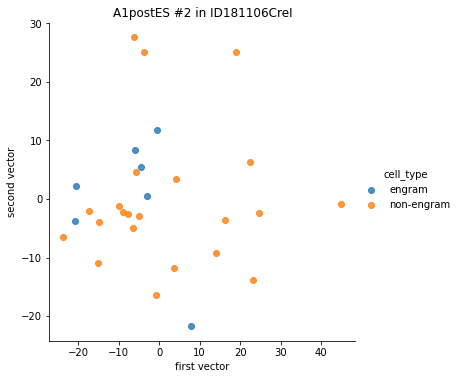

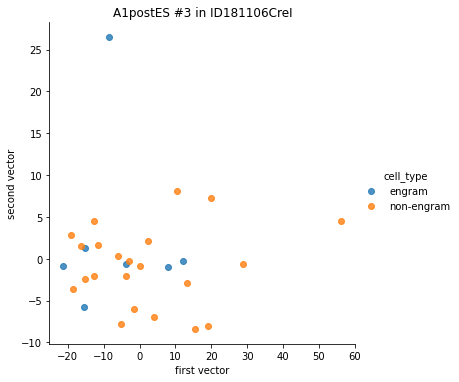

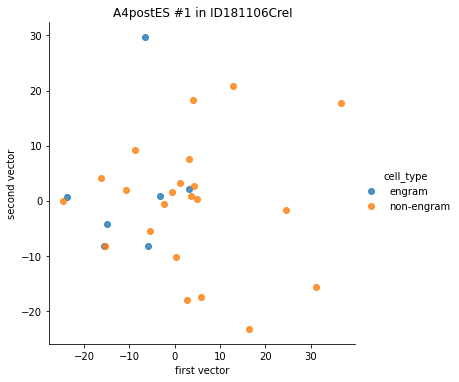

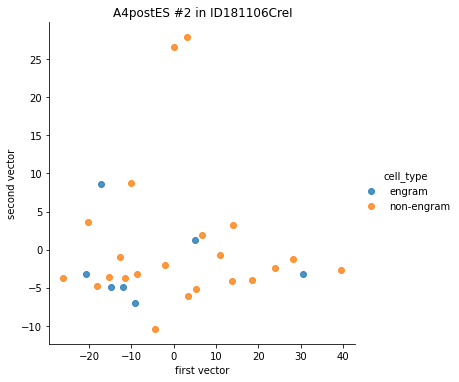

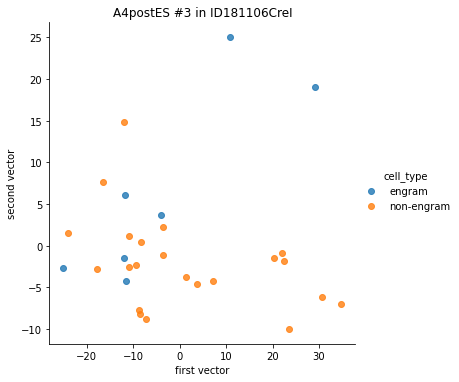

animal name: ID181106CreK


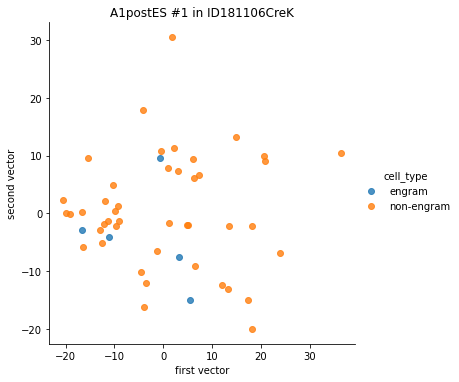

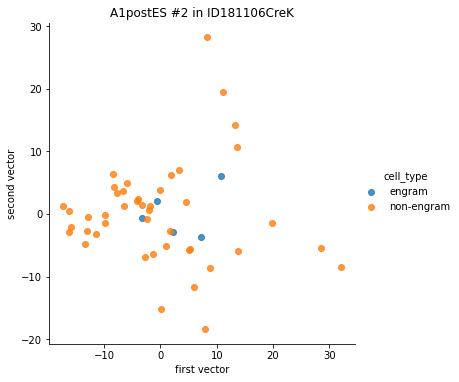

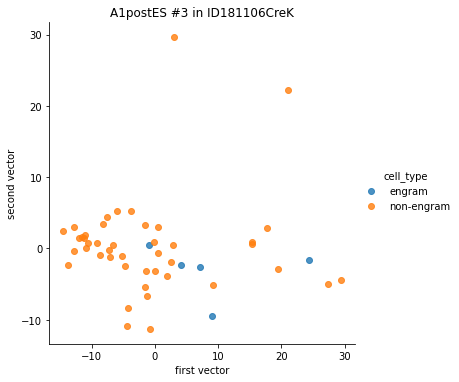

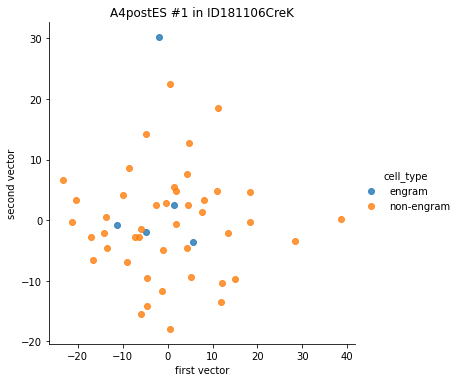

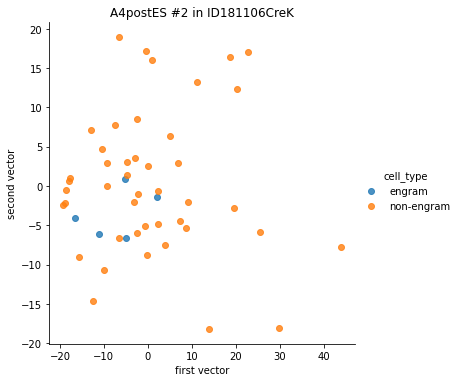

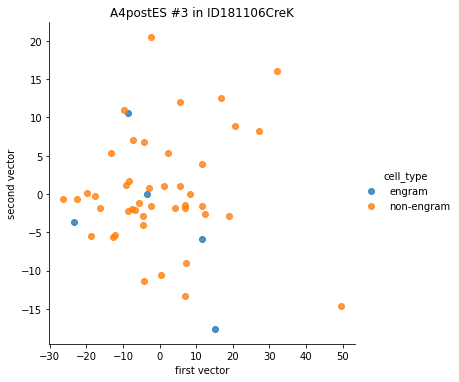

animal name: ID181106CreL


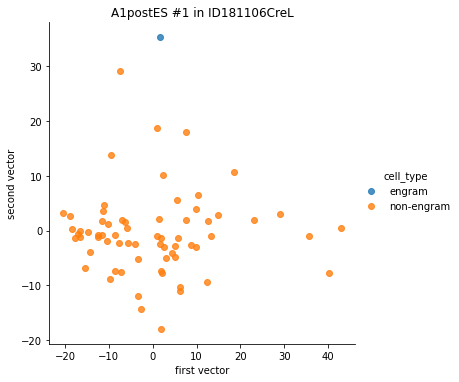

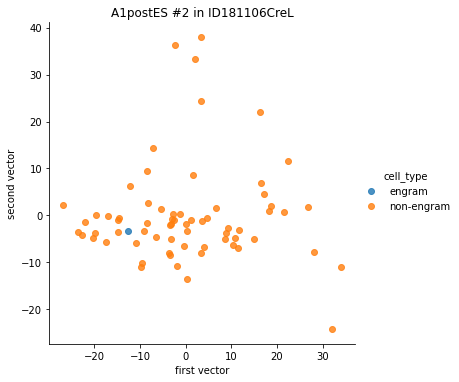

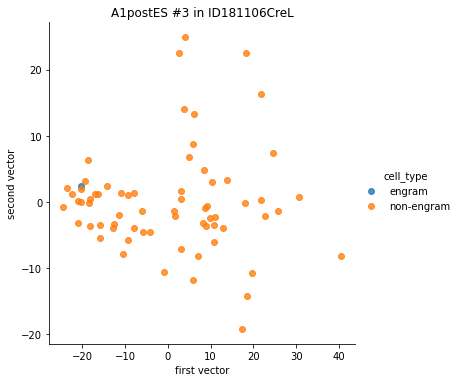

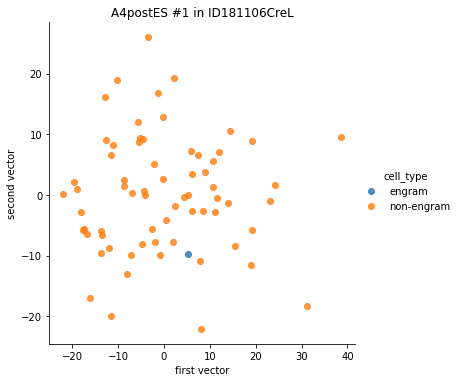

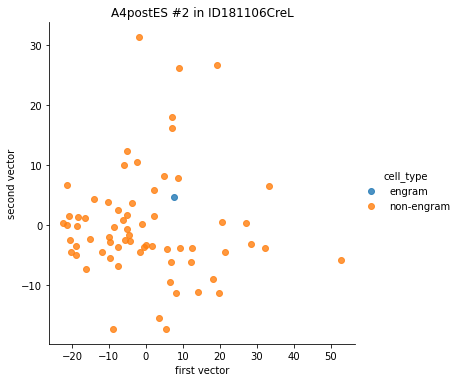

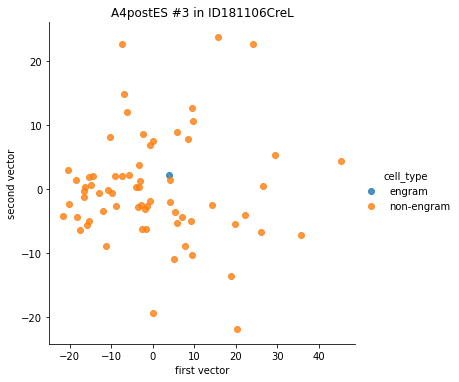

animal name: ID181106CreN


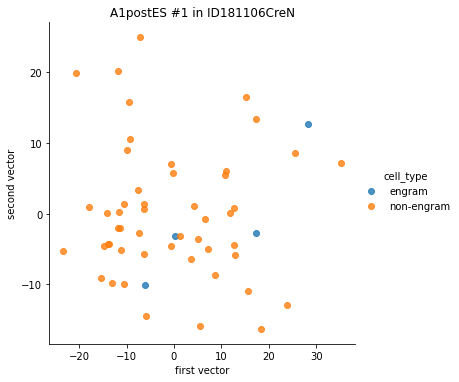

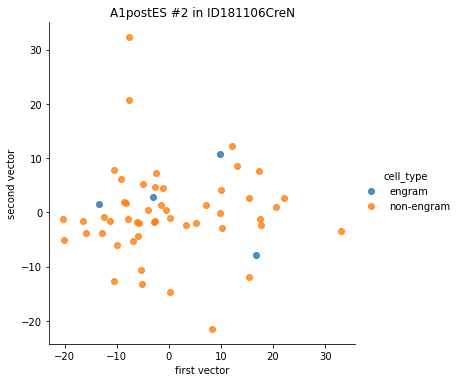

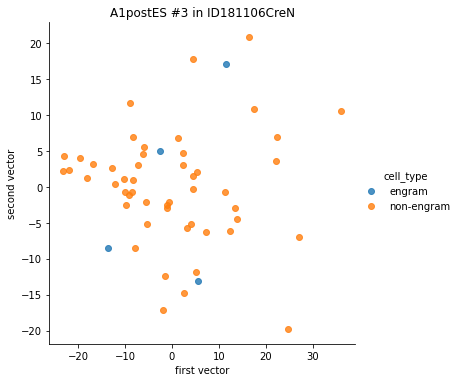

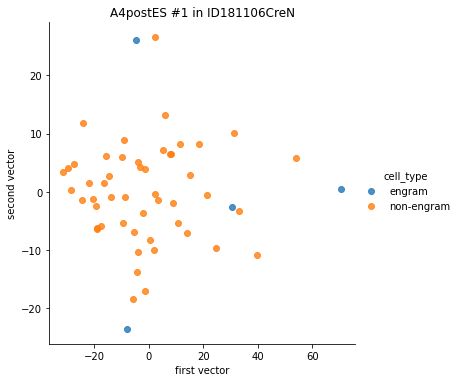

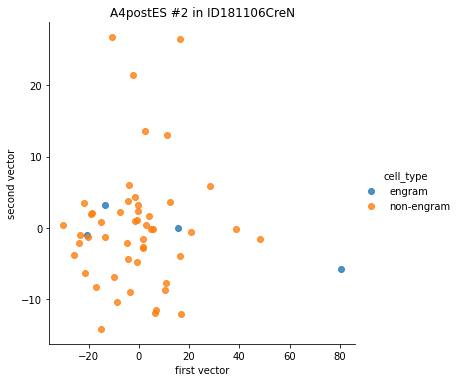

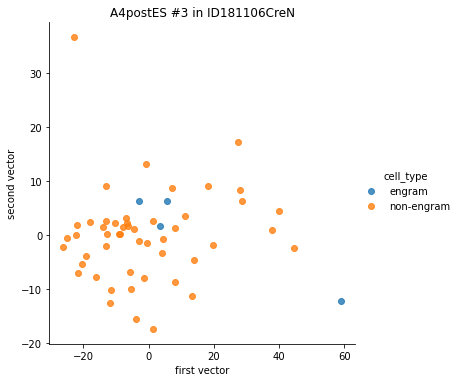

animal name: ID181106CreQ


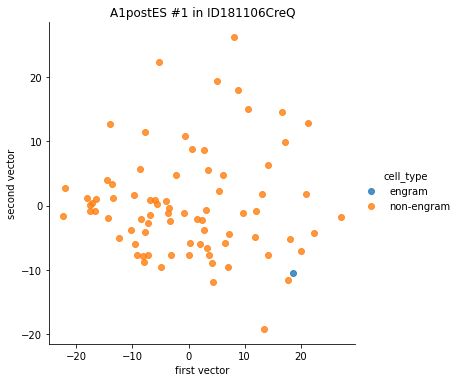

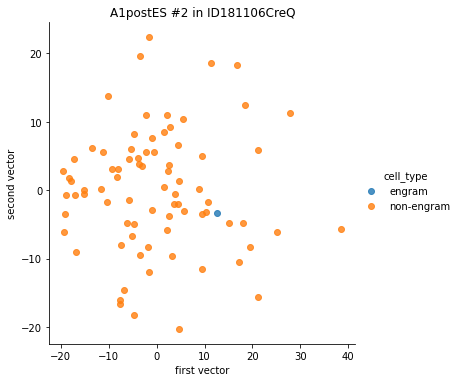

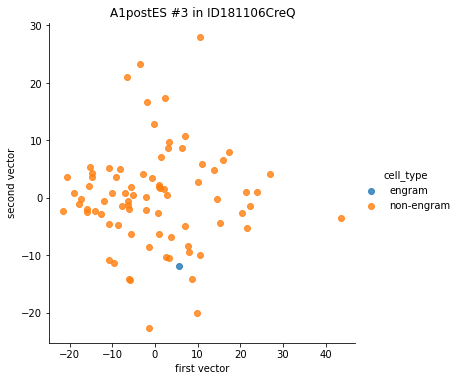

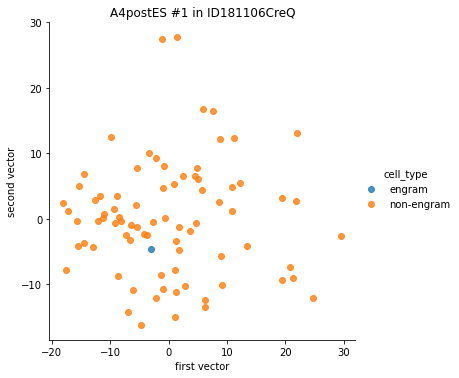

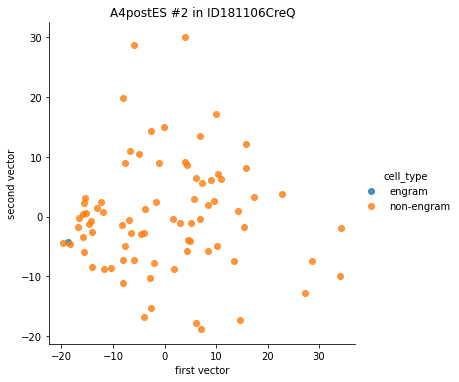

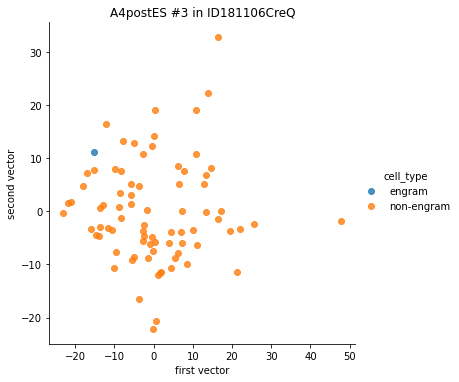

In [6]:
for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    shock_cells = all_shock_cells[animal_name]
    
    a1_csv = ContextDataCSV(animal_name, 'A1postES')
    a1_matrix = MatrixOptimizer(a1_csv.data_frame).divide_sd()
    a1_shock_cell_df = a1_matrix.loc[:, shock_cells]
    
    a4_csv = ContextDataCSV(animal_name, 'A4postES')
    a4_matrix = MatrixOptimizer(a4_csv.data_frame).divide_sd()
    a4_shock_cell_df = a4_matrix.loc[:, shock_cells]
    
    a1_1, a1_2, a1_3 = split_by_time(a1_shock_cell_df)
    a4_1, a4_2, a4_3 = split_by_time(a4_shock_cell_df)
    
    pca_index_list = []
    pca_index_list += ['engram'] * len(engram_shock_cells[animal_name])
    pca_index_list += ['non-engram'] * len(non_engram_shock_cells[animal_name])
    pca_index = pd.Index(pca_index_list, name='cell_type')
    
    a1_1_pca = PCA()
    a1_1_pca_train = a1_1_pca.fit_transform(a1_1.T)
    a1_1_pca_train_df = pd.DataFrame(data=a1_1_pca_train, index=pca_index)
    scatterPlot(a1_1_pca_train_df, 'A1postES #1 in %s' % animal_name)
    
    a1_2_pca = PCA()
    a1_2_pca_train = a1_2_pca.fit_transform(a1_2.T)
    a1_2_pca_train_df = pd.DataFrame(data=a1_2_pca_train, index=pca_index)
    scatterPlot(a1_2_pca_train_df, 'A1postES #2 in %s' % animal_name)
    
    a1_3_pca = PCA()
    a1_3_pca_train = a1_3_pca.fit_transform(a1_3.T)
    a1_3_pca_train_df = pd.DataFrame(data=a1_3_pca_train, index=pca_index)
    scatterPlot(a1_3_pca_train_df, 'A1postES #3 in %s' % animal_name)
    
    a4_1_pca = PCA()
    a4_1_pca_train = a4_1_pca.fit_transform(a4_1.T)
    a4_1_pca_train_df = pd.DataFrame(data=a4_1_pca_train, index=pca_index)
    scatterPlot(a4_1_pca_train_df, 'A4postES #1 in %s' % animal_name)
    
    a4_2_pca = PCA()
    a4_2_pca_train = a4_2_pca.fit_transform(a4_2.T)
    a4_2_pca_train_df = pd.DataFrame(data=a4_2_pca_train, index=pca_index)
    scatterPlot(a4_2_pca_train_df, 'A4postES #2 in %s' % animal_name)
    
    a4_3_pca = PCA()
    a4_3_pca_train = a4_3_pca.fit_transform(a4_3.T)
    a4_3_pca_train_df = pd.DataFrame(data=a4_3_pca_train, index=pca_index)
    scatterPlot(a4_3_pca_train_df, 'A4postES #3 in %s' % animal_name)